<table style="width:100%">
  <tr>
    <th> <img src="../img/logo_EPM_UNIOVI_CabeceroWEB.gif" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></th>
    <th><font color=brown>Procesamiento de imágenes de Sensores Aerotransportados y Satélite</font>
         </font></th> 
    <th><font color=green>Universidad de Oviedo.                       Ingeniería en Geomática</font>        sgcortes@uniovi.es</th>
  </tr>
</table>

## T14 Reconocimiento e interpretación

### 14.1 Clasificación con K-means

La función a emplear en OpenCV es la siguiente:

**cv2.kmeans(data, K, criteria, attempts, flags[, bestLabels[, centers]]) → retval, bestLabels, centers**

**_Output_**

Los parámetros de salida son :
* compactness: la magnitud del error que se minimiza en el algoritmo (llamada compactness en alguna documentación) 

* bestlabels: Matriz con los píxeles etiquetados. A cada pixel le corresponde una etiqueta entre 1 y K-1 (siendo K el número de clases especificado)

* centers: Una matriz [c x n] los centros de las K clases generadas  

**_Input_**

* data: Debe ser del tipo de datos np.float32, y cada característica debe estar en una sola columna.
* nclusters(K) : Número de clusters requeridos al final
* criterios Es el criterio de terminación de la iteración. Cuando se cumple este criterio, se detiene la iteración del algoritmo. En realidad, debería ser una tupla de 3 parámetros. Son ("type", "max_iter", "epsilon"):

    -   3.a - tipo de criterios de terminación. 3 posibilidades como las de abajo:
cv2.TERM_CRITERIA_EPS - detiene la iteración del algoritmo si se alcanza la precisión especificada, épsilon. cv2.TERM_CRITERIA_MAX_ITER - detiene el algoritmo después del número especificado de iteraciones, max_iter. cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - detiene la iteración cuando se cumple cualquiera de las condiciones anteriores.
    -  3.b - max_iter - Un número entero que especifica el número máximo de iteraciones.
    -  3.c - epsilon - Exactitud requerida

* intentos: Indicador para especificar el número de veces que se ejecuta el algoritmo utilizando diferentes etiquetas iniciales. El algoritmo devuelve las etiquetas que ofrecen la mejor compactación. Esta compacidad se devuelve como salida.

* flags: Este indicador se utiliza para especificar cómo se toman los centros iniciales. Normalmente se usan dos flags para esto: cv2.KMEANS_PP_CENTERS y cv2.KMEANS_RANDOM_CENTERS.

Otro ejemplo puede verse también en el siguiente tutorial
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html


In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def wind(image):
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Compactness: 486366028.2033639
[[ 35  34  39]
 [223 224 216]
 [ 78  83  88]
 [170 173 167]
 [127 132 128]]
label image (flattened: [[4]
 [2]
 [2]
 ...
 [1]
 [1]
 [1]]
imagen con colores de los centros: [[127 132 128]
 [ 78  83  88]
 [ 78  83  88]
 ...
 [223 224 216]
 [223 224 216]
 [223 224 216]]
(619, 1100, 3)


Text(0.5,1,'Imagen clasificada con k-means (5 clases). Colores de los centros de las clases')

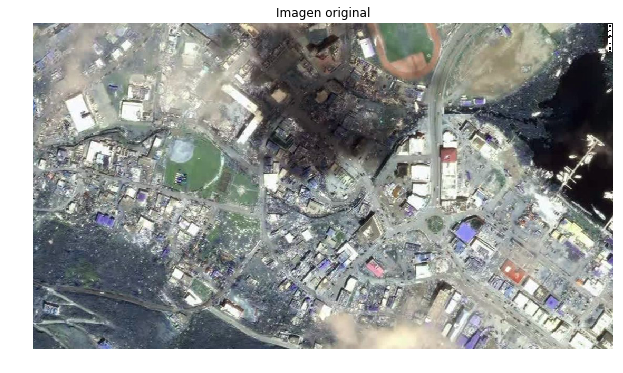

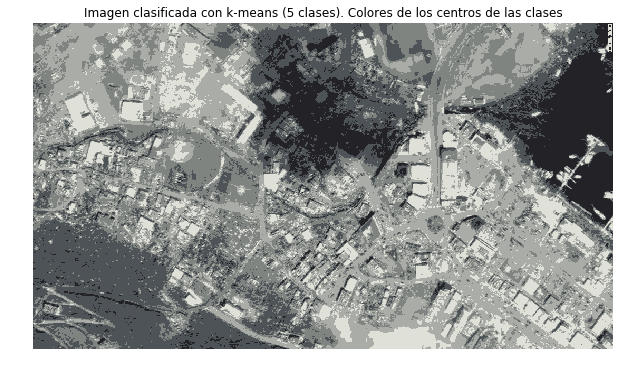

In [81]:
img=cv2.imread('../img/irma_devastation.jpg',1)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen original")
# Convertimos los datos de la imagen en un vector de una dimensión para cada canal y de tipo float32 
imgCL=np.float32(img.reshape((-1,3)))
# Definición de error máximo (en pixels) y máximo numero de iteraciones
criterios=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
# Número de clases a establecer
K=5
# Algoritmo K-means
ret,lab,center = cv2.kmeans(imgCL, K, None, criterios, 10, cv2.KMEANS_RANDOM_CENTERS)
      
# No suministramos niguna muesttra al algoritmo (None)
# Pedimos que se repita el proceso 10 veces y nos quedaremos con la solución que de mejor resultado
print('Compactness:',ret)
center=np.uint8(center)
print(center)
print('label image (flattened:',lab)
# creamos una imagen con los valores de los centros para cada vaor de la etiqueta
res=center[lab.flatten()] 
print('imagen con colores de los centros:',res)
res2=res.reshape((img.shape))
print(res2.shape)
plt.figure(figsize=(12,6))
plt.imshow(res2)
plt.axis('off')
plt.title("Imagen clasificada con k-means (5 clases). Colores de los centros de las clases")

Podemos aumentar el contraste de la imagen empleando colores falsos en los centros de las clases, por ejemplo:
Rojo, Verde, azul y magenta:

(-0.5, 1099.5, 618.5, -0.5)

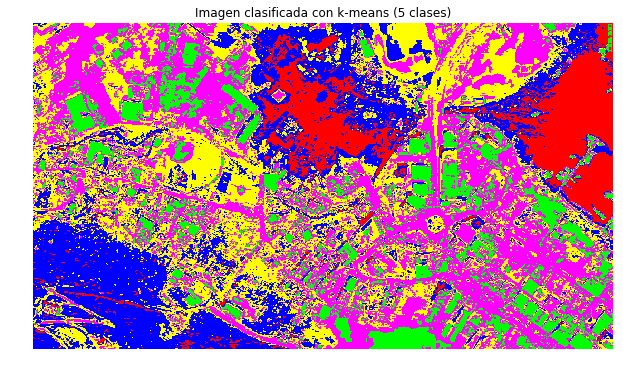

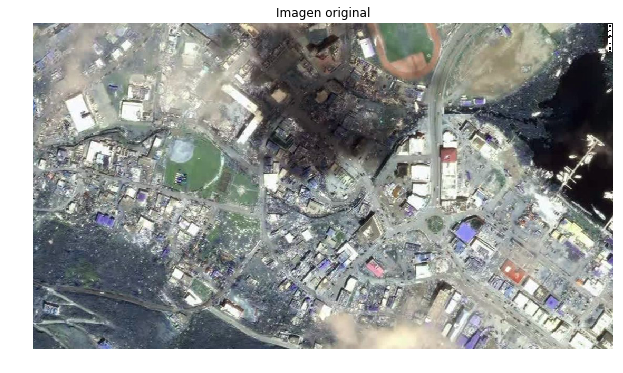

In [82]:
colores=np.array([[255, 0, 0],[0, 255, 0],[0, 0, 255],[255, 0, 255],[255,255,0]])
res3=colores[lab.flatten()] 
res3=res3.reshape((img.shape))
plt.figure(figsize=(12,6))
plt.imshow(res3)
plt.title("Imagen clasificada con k-means (5 clases)")
plt.axis('off')
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')